In [ ]:
%pip install -r requirements.txt

In [2]:
# imports

# Standard library imports
import os
from pathlib import Path
from collections import defaultdict

# Third-party imports
import pyreadstat
import numpy as np
from scipy.stats import skew
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go


In [3]:
# Check the contents of the 'Dataset' folder inside the extracted path
current_working_dir = os.getcwd()
current_working_dir

'c:\\DEPI_Project - 2025'

In [4]:
path = os.path.join(current_working_dir, "DataSet/CSV/Diabetes.csv")

df = pd.read_csv(path)


In [5]:
display(df.info(),df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5437 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5437 non-null   int64  
 1   gender                  5437 non-null   object 
 2   pulse_rate              5437 non-null   int64  
 3   systolic_bp             5437 non-null   int64  
 4   diastolic_bp            5437 non-null   int64  
 5   glucose                 5437 non-null   float64
 6   height                  5437 non-null   float64
 7   weight                  5437 non-null   float64
 8   bmi                     5437 non-null   float64
 9   family_diabetes         5437 non-null   int64  
 10  hypertensive            5437 non-null   int64  
 11  family_hypertension     5437 non-null   int64  
 12  cardiovascular_disease  5437 non-null   int64  
 13  stroke                  5437 non-null   int64  
 14  diabetic                5437 non-null   

None

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5437.0,45.533750,14.321155,8.00,35.00,45.00,55.00,112.00
pulse_rate,5437.0,76.768990,12.290076,5.00,69.00,76.00,84.00,133.00
systolic_bp,5437.0,133.859849,22.293015,62.00,119.00,130.00,147.00,231.00
diastolic_bp,5437.0,82.064742,12.489593,45.00,73.00,81.00,90.00,119.00
glucose,5437.0,7.540682,2.923080,0.00,6.00,6.92,8.12,33.46
height,5437.0,1.548571,0.080955,0.36,1.52,1.55,1.60,1.96
weight,5437.0,53.626816,10.091550,3.00,46.70,53.00,59.90,100.70
bmi,5437.0,22.472301,8.778764,1.22,19.63,21.87,24.49,574.13
family_diabetes,5437.0,0.037337,0.189603,0.00,0.00,0.00,0.00,1.00
hypertensive,5437.0,0.109803,0.312673,0.00,0.00,0.00,0.00,1.00


In [7]:
print(df.shape)
print("###############")
print(df.dtypes.unique)

(5437, 15)
###############
<bound method Series.unique of age                         int64
gender                     object
pulse_rate                  int64
systolic_bp                 int64
diastolic_bp                int64
glucose                   float64
height                    float64
weight                    float64
bmi                       float64
family_diabetes             int64
hypertensive                int64
family_hypertension         int64
cardiovascular_disease      int64
stroke                      int64
diabetic                   object
dtype: object>


In [8]:
df.isnull().sum(axis=0)

age                       0
gender                    0
pulse_rate                0
systolic_bp               0
diastolic_bp              0
glucose                   0
height                    0
weight                    0
bmi                       0
family_diabetes           0
hypertensive              0
family_hypertension       0
cardiovascular_disease    0
stroke                    0
diabetic                  0
dtype: int64

# Data Type & Preprocessing Guide for Variables


In [9]:
def print_unique_type_valuecount(df, column_name):
    # Check if df is defined and is a DataFrame
    if df is None or not isinstance(df, pd.DataFrame):
        print("Error: The provided object is not a valid DataFrame.")
        return

    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    # Proceed with printing info
    print("Unique values:")
    print(df[column_name].unique())

    print("\nData type:")
    print(df[column_name].dtype)

    print("\nFrequency of unique values:")
    print(df[column_name].value_counts(dropna=False))


# Gender  Data Processing Guide

### Data Source
https://data.mendeley.com/datasets/7m7555vgrn/1 
### Variables
###  "Gender"
### Recommended Data Type
**Primary Type**: `pandas.boolean`

| Code| Value Description |
|-----|-------------------|
| 1   | Male              |
| 0   | Female            |




In [10]:
new_df=df.copy()

In [11]:
print_unique_type_valuecount(new_df,"gender")

Unique values:
['Female' 'Male']

Data type:
object

Frequency of unique values:
gender
Female    3859
Male      1578
Name: count, dtype: int64


In [12]:

new_df["gender"]=new_df["gender"].replace({"Male":1,"Female":0})
new_df["gender"]=new_df["gender"].astype("boolean")

C:\Users\Mostafa.Elgamal\AppData\Local\Temp\ipykernel_24612\1035040771.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



# Target Variable Diabetes Preprocessing Guide

### Data Source
(https://data.mendeley.com/datasets/7m7555vgrn/1)

### Variables
-  diabetes?

## Variable Overview
### Coding Scheme

| Code | Value Description |
|------|-------------------|
| 1    | Yes               |
| 2    | No                |
| 3    | Borderline        |
| 7    | Refused           |
| 9    | Don't know        |
| .    | Missing           |

### Recommended Data Type
- **Primary Type**: `pandas.boolean`


In [13]:
print_unique_type_valuecount(new_df,"diabetic")

Unique values:
['No' 'Yes']

Data type:
object

Frequency of unique values:
diabetic
No     5093
Yes     344
Name: count, dtype: int64


In [14]:
# Map values
new_df["diabetic"] = new_df["diabetic"].replace({"No": 0, "Yes": 1})

# Convert to boolean type
new_df["diabetic"] = new_df["diabetic"].astype("boolean")


C:\Users\Mostafa.Elgamal\AppData\Local\Temp\ipykernel_24612\2635426941.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [15]:
count_numerical = 0
count_boolean = 0
for col in new_df.columns:
    if new_df[col].dtype == "boolean"  :
        count_boolean +=1
    else:
        count_numerical += 1
print(new_df.shape, count_boolean, count_numerical)

(5437, 15) 2 13


# Feature Selection

In [16]:
from scipy.stats import pointbiserialr , pearsonr

## Point-Biserial Correlation
- A method which calculates the correlation between a continuous variable (e.g. weight) and a Binary Variable (e.g. male,female)

### Point-Biserial Correlation Formula

The Point-Biserial correlation coefficient between a continuous variable \(X\) and a binary variable \(Y\) is computed using the following formula:

$$
cor_{pb} = \frac{M_1 - M_0}{s_X} \sqrt{\frac{n_1 n_0}{n(n-1)}}
$$

Where:
- \(M_1\) = Mean of \(X\) when \(Y=1\)
- \(M_0\) = Mean of \(X\) when \(Y=0\)
- \(s_X\) = Standard deviation of \(X\) (all values)
- \(n_1\) = Number of cases where \(Y=1\)
- \(n_0\) = Number of cases where \(Y=0\)
- \(n\) = Total sample size (\(n = n_1 + n_0\))


In [17]:
def point_byserial_correlation_manual(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    
    if len(np.unique(y)) != 2:
        raise ValueError("Target Variable must contain exactly two distinct values")
                         
    M1 = np.mean(x[y == 1])
    M0 = np.mean(x[y == 0])
    sx = np.std(x, ddof=1)

    n = len(y)
    n1 = np.sum(y == 1)
    n0 = n - n1
    
    cor_pb = ((M1 - M0) / sx) * np.sqrt((n1 * n0) / (n ** 2))
    return cor_pb

## Phi Coefficient
- A method which calculates the correlation between two Binary Variables 



### Formula for Phi Coefficient

The Phi Coefficient for two binary variables \( X \) and \( Y \) is computed using the following formula:

$$
phi = \frac{(ad - bc)}{\sqrt{(a+b)(c+d)(a+c)(b+d)}}
$$


Where:
- \( a \) = Number of observations where both \( X = 1 \) and \( Y = 1 \)
- \( b \) = Number of observations where \( X = 1 \) and \( Y = 0 \)
- \( c \) = Number of observations where \( X = 0 \) and \( Y = 1 \)
- \( d \) = Number of observations where both \( X = 0 \) and \( Y = 0 \)


In [18]:
def phi_coefficient_manual(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    
    if len(np.unique(y)) != 2:
        raise ValueError("Target Variable must contain exactly two distinct values")
                         
    a = np.sum((x == 1) & (y == 1))
    b = np.sum((x == 1) & (y == 0))
    c = np.sum((x == 0) & (y == 1))
    d = np.sum((x == 0) & (y == 0))
    
    cor_phi = (a * d - b * c) / np.sqrt( (a+b) * (c+d) * (a+c) * (b+d) )
    return cor_phi

# Spearman's Rank Correlation and Cramér's V

## 1. Spearman's Rank Correlation

**Spearman's Rank Correlation**  is a non-parametric measure of the correlation between two ranked variables. It evaluates the degree to which the variables' ranks are related.

### Formula for Spearman's Rank Correlation
Spearman’s rank correlation coefficient is calculated as:

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

Where:
- \( d_i \) = Difference between the ranks of corresponding values in the two variables
- \( n \) = Number of paired ranks

### Steps for Calculation:
1. Rank the data points in each variable.
2. Calculate the difference \( d_i \) between the ranks of corresponding data points.
3. Square the differences and sum them up.
4. Use the formula to calculate the correlation coefficient.

- It is a **non-parametric** test, meaning it does not assume the data follows a specific distribution.
- Useful for ordinal variables or continuous variables that are not normally distributed.






# Cramér's V

**Cramér's V** is a statistical measure used to assess the correlation between two categorical variables. It is derived from the Chi-squared statistic and is used to quantify the association between nominal (categorical) variables.

Cramér's V is calculated using the following formula:

$$
V = \sqrt{\frac{\chi^2}{n \times (k - 1)}}
$$

Where:
- \( ${\chi^2}$ \) = Chi-squared statistic
- \( n \) = Total number of observations (sample size)
- \( k \) = The smaller of the number of rows or columns in the contingency table

## Steps for Calculation:
1. **Construct a contingency table**: The first step is to create a contingency table (cross-tabulation) of the two categorical variables.
2. **Calculate the Chi-squared statistic**: Use the Chi-squared test to evaluate the independence of the two variables.
3. **Apply the Cramér's V formula**: Once the Chi-squared value is obtained, substitute it into the formula to calculate Cramér's V.

- **Applicable for Nominal Variables**: Cramér's V is suitable for categorical (nominal) variables. It can be applied to 2x2 tables and tables with more than two rows and columns.



In [19]:
def correlation(df, target_column, features):

    # Ensure target is in the DataFrame
    if target_column not in df.columns:
        raise ValueError(f"Target column '{target_column}' not found in DataFrame.")

    if not features:
        raise ValueError(f"Correlation columns must be provided.")
    
    correlation_results = []

    target = df[target_column]
    for col in features:
        feature = df[col]
        
        if feature.dtype == "float64" or feature.dtype =="int64":
            cor_scipy = pointbiserialr(feature, target)
            correlation_results.append({
                'Feature': col,
                'Correlation': cor_scipy.correlation
            })

        elif feature.dtype == "boolean":
            cor_scipy = pearsonr(feature.astype(float), target.astype(float))
            correlation_results.append({
                'Feature': col,
                'Correlation': cor_scipy[0]
            })
    return pd.DataFrame(correlation_results)
        
        


In [20]:
correlation_columns = [col for col in new_df.columns if col != "diabetic"]
correlation_df = correlation(new_df, 'diabetic', correlation_columns)

In [21]:
correlation_df

,Feature,Correlation
0,age,0.087600
1,gender,0.026899
2,pulse_rate,0.046014
3,systolic_bp,0.155269
4,diastolic_bp,0.156728
5,glucose,0.305426
6,height,0.033334
7,weight,0.108157
8,bmi,0.042708
9,family_diabetes,-0.023288


In [22]:
low_corr = correlation_df[correlation_df['Correlation'].abs() < 0.04]
high_corr = correlation_df[correlation_df['Correlation'].abs() > 0.04]
print(len(low_corr), len(high_corr))



5 9


In [23]:
low_corr_columns = low_corr.Feature.tolist()
print(low_corr_columns)

['gender', 'height', 'family_diabetes', 'family_hypertension', 'stroke']


In [24]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

In [25]:

# Oversampling
#X = df_Analysis.drop(columns=['DiagnosedWithDiabetes'])  # Replace 'DiagnosedWithDiabetes' with your target column
X=new_df.drop(['diabetic'], axis=1)
original_dtypes = X.dtypes
data_columns = X.columns.tolist()
X = X.values

y = new_df['diabetic']
y = y.values

# Apply SMOTE for upsampling the minority class in the entire dataset (for analysis, not training)
smote = SMOTE(random_state=42,) 
# Apply SMOTE to the entire dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine majority and upsampled minority
X_resampled_df = pd.DataFrame(X_resampled, columns=data_columns)

for col in data_columns:
    if original_dtypes[col] == "boolean":
        X_resampled_df[col] = X_resampled_df[col].astype("int")
        X_resampled_df[col] = X_resampled_df[col].astype("boolean")
    else :
        X_resampled_df[col] = X_resampled_df[col].astype(original_dtypes[col])

y_resampled_df = pd.Series(y_resampled, name='diabetic')
y_resampled_df = y_resampled_df.astype("int")
y_resampled_df = y_resampled_df.astype("boolean")

# Combine
df_balanced = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Shuffle
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [26]:
print(df_balanced.head,df_balanced.shape)

<bound method NDFrame.head of        age  gender  pulse_rate  systolic_bp  diastolic_bp    glucose  \
0       40   False          75          120            80   5.000000   
1       36   False          79          115            76  13.707261   
2       38   False          91          138            97   9.000000   
3       56   False          73          168            87  13.490000   
4       50   False          66          111            73   7.410000   
...    ...     ...         ...          ...           ...        ...   
10181   40   False          91          147            90  16.241881   
10182   58   False          51          165            89   8.900000   
10183   57    True          57          135            80   4.770000   
10184   40    True          69          111            69   7.780000   
10185   40   False          71          127            78  12.383397   

         height     weight        bmi  family_diabetes  hypertensive  \
0      1.570000  61.000000  24.75

In [27]:


# Load the data
data = df_balanced.copy()

# Separate features and target
X = data.drop(['diabetic'], axis=1)
y = data['diabetic']

# Handle missing values (simple imputation for demonstration)
X = X.fillna(X.mean())

# Select top 10 features using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y)

# Get scores and p-values
scores = pd.DataFrame({'Feature': X.columns, 
                      'F-Score': selector.scores_, 
                      'p-value': selector.pvalues_})

# Sort by F-score (higher is better)
top_features = scores.sort_values('F-Score', ascending=False).head(10)
print(top_features.Feature.values)

['glucose' 'hypertensive' 'diastolic_bp' 'systolic_bp' 'weight' 'age'
 'gender' 'family_hypertension' 'family_diabetes' 'bmi']


In [28]:
print(top_features)

                Feature      F-Score        p-value
5               glucose  2143.009592   0.000000e+00
10         hypertensive  1215.247598  1.232029e-251
4          diastolic_bp  1086.643813  1.596026e-226
3           systolic_bp  1077.939496  8.187671e-225
7                weight   557.615837  4.503204e-120
0                   age   346.337271   4.814445e-76
1                gender   200.914186   3.542810e-45
11  family_hypertension   161.415673   1.053491e-36
9       family_diabetes   155.962287   1.570025e-35
8                   bmi   108.192090   3.262166e-25


In [29]:
numerical_cols = df_balanced.select_dtypes(include=['float64', 'int64']).columns
boolean_cols = df_balanced.select_dtypes(include=['boolean']).columns.drop('diabetic')

In [30]:
print(numerical_cols,boolean_cols)

Index(['age', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose', 'height',
       'weight', 'bmi', 'family_diabetes', 'hypertensive',
       'family_hypertension', 'cardiovascular_disease', 'stroke'],
      dtype='object') Index(['gender'], dtype='object')


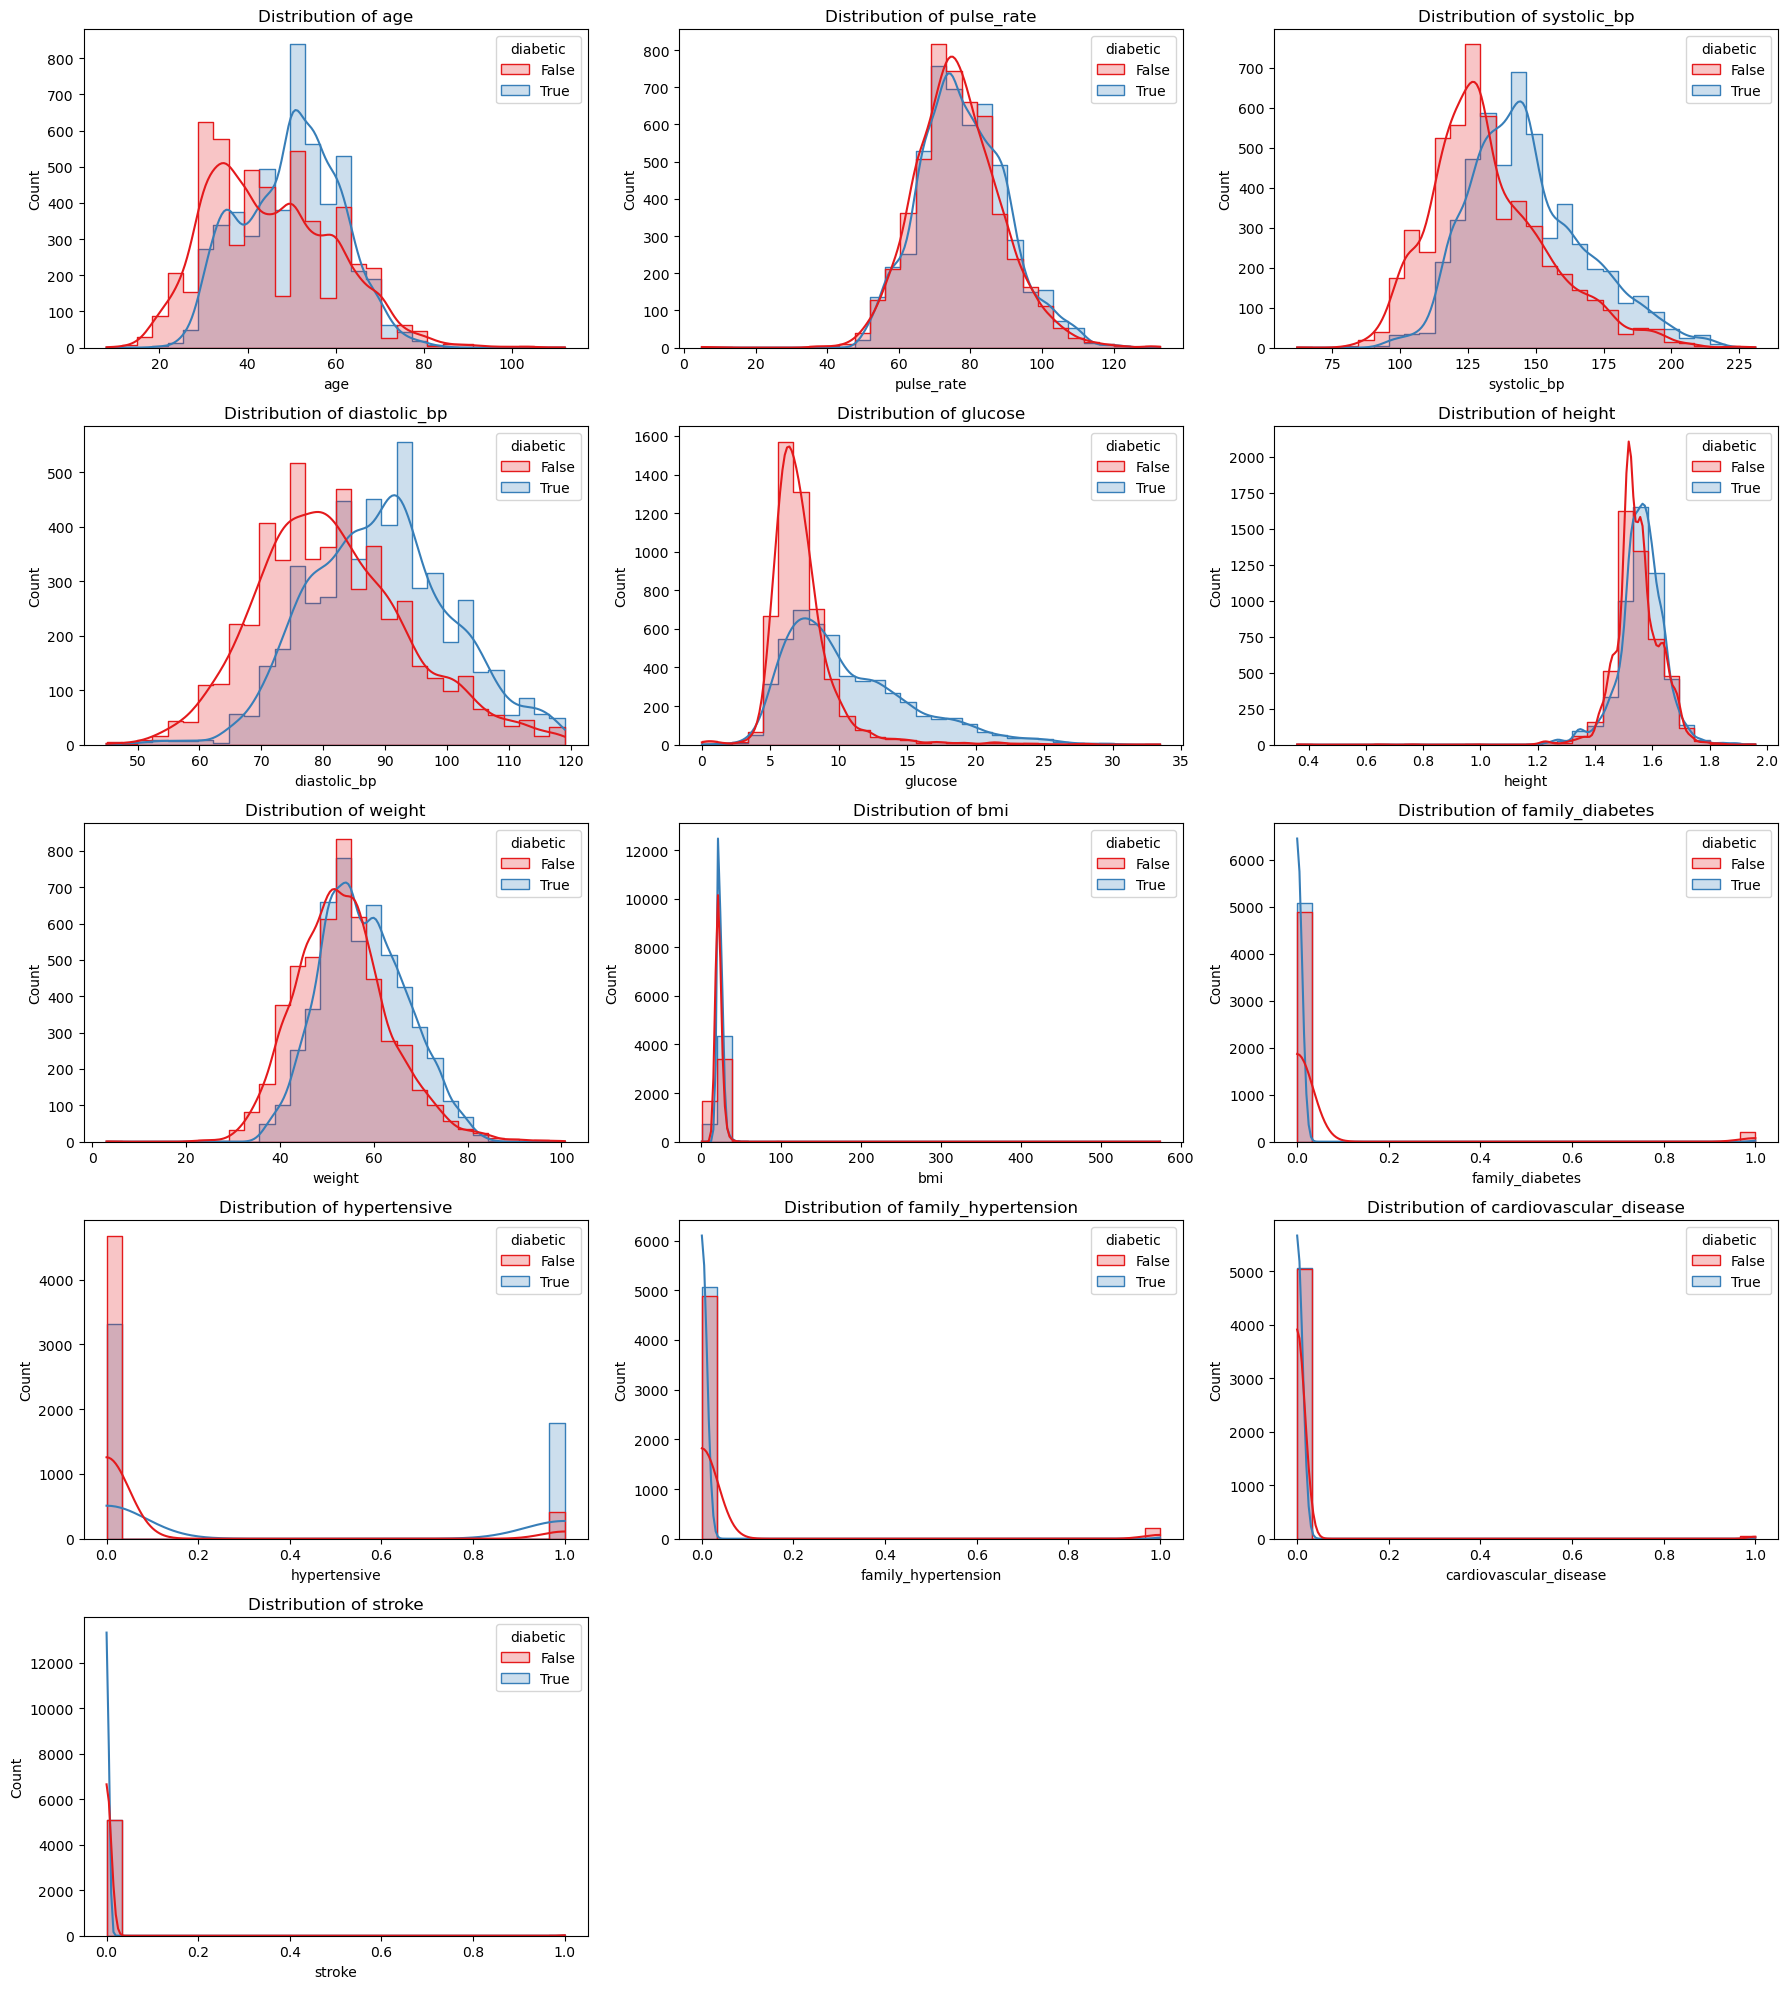

In [31]:
# Plot histograms for numerical features grouped by the target
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4))
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(data=df_balanced, x=col, hue='diabetic', kde=True, bins=30, palette='Set1', element='step')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [32]:
# Drop low correlation columns from the DataFrame
df_AfterCorrelation = new_df.drop(columns=low_corr_columns)

# 3. Save to CSV and Excel
csv_path = "cleaned_high_corr_data.csv"
excel_path = "cleaned_high_corr_data.xlsx"

data_after_correlation_csv_path = os.path.join(current_working_dir, "DataSet/CSV/cleaned_data_AfterCorrelation.csv")
data_after_correlation_excel_path = os.path.join(current_working_dir, "DataSet/Excel/cleaned_data_AfterCorrelation.xlsx")

if not os.path.exists(data_after_correlation_csv_path):
    df_AfterCorrelation.to_csv(data_after_correlation_csv_path, index=False)
    print(f"Data after imputation has been saved to {data_after_correlation_csv_path}.")

if not os.path.exists(data_after_correlation_excel_path):
    df_AfterCorrelation.to_excel(data_after_correlation_excel_path, index=False)
    print(f"Data after imputation has been saved to {data_after_correlation_excel_path}.")


Data after imputation has been saved to c:\DEPI_Project - 2025\DataSet/CSV/cleaned_data_AfterCorrelation.csv.


OSError: Cannot save file into a non-existent directory: 'c:\DEPI_Project - 2025\DataSet\Excel'

In [ ]:
print(df_AfterCorrelation.shape, df_AfterCorrelation.dtypes.unique())

(5369, 52) [dtype('float64')
 CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0], ordered=True, categories_dtype=int64)
 BooleanDtype
 CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ordered=True, categories_dtype=float64)
 CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 6.0, 7.0], ordered=False, categories_dtype=float64)
 CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0], ordered=True, categories_dtype=float64)]


# Analysis

C:\Users\Mostafa.Elgamal\AppData\Local\Temp\ipykernel_26340\3881860651.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




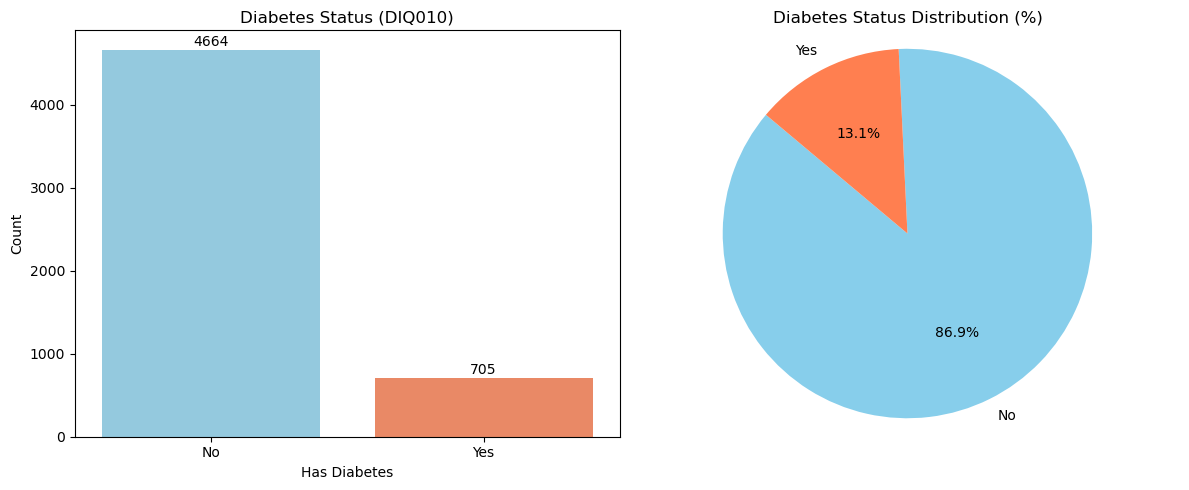

In [ ]:
# Get counts
counts = df_AfterCorrelation['DIQ010'].value_counts()
labels = ['No', 'Yes']
colors = ['skyblue', 'coral']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Bar Plot ---
sns.barplot(x=counts.index, y=counts.values, palette=colors, ax=axes[0])
axes[0].set_title('Diabetes Status (DIQ010)')
axes[0].set_xlabel('Has Diabetes')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(labels)

# Annotate bar values
for i, count in enumerate(counts.values):
    axes[0].text(i, count + 50, str(count), ha='center')

# --- Pie Chart ---
axes[1].pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Diabetes Status Distribution (%)')
axes[1].axis('equal')  # Ensures pie is circular

plt.tight_layout()
plt.show()


Approximately 13.1% positive (true) and 86.9% negative (false).
Data suffers from severe Class Imbalance — accuracy alone will be misleading.

## Solutions:
- Precision, Recall, F1-score, and ROC-AUC for evaluation.
- Oversampling the minority class (e.g., SMOTE).
- Undersampling the majority class.
- Class weights in models (like class_weight='balanced' in sklearn models).

## Oversample
SMOTE is a resampling technique used to handle imbalanced datasets, where one class (usually the "positive" class) is significantly underrepresented.

Instead of just duplicating existing minority class examples, SMOTE creates synthetic examples that are similar but not identical to existing ones.

### How SMOTE Works
- Choose a minority class sample at random.
- Find its k nearest neighbors (usually k=5) in the feature space.
- Randomly select one of those neighbors.
- Generate a new sample along the line between the original and the neighbor.

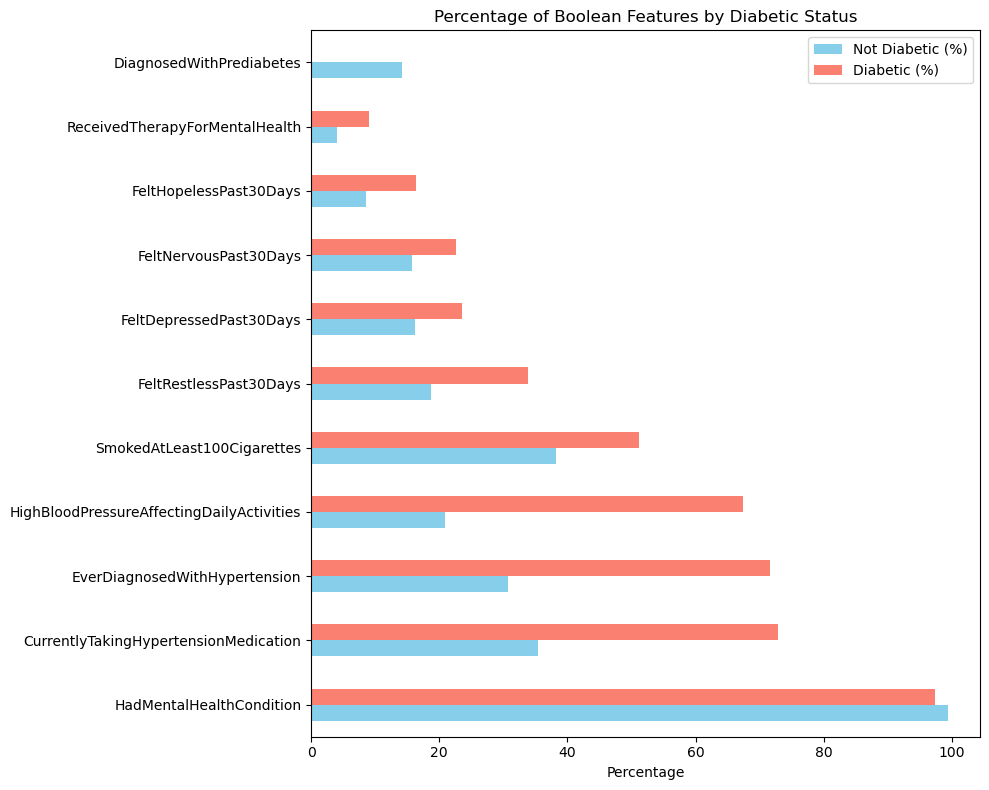

In [ ]:
# Boolean feature analysis - percentage of True in each group of DIQ010
bool_summary = {}

for col in boolean_cols:
    counts = df_Analysis.groupby('DiagnosedWithDiabetes')[col].mean() * 100  # percentage of True
    bool_summary[col] = counts

bool_df = pd.DataFrame(bool_summary).T
bool_df.columns = ['Not Diabetic (%)', 'Diabetic (%)']

# Plot boolean feature differences
bool_df.sort_values('Diabetic (%)', ascending=False, inplace=True)
bool_df.plot(kind='barh', figsize=(10, 8), color=['skyblue', 'salmon'])
plt.title('Percentage of Boolean Features by Diabetic Status')
plt.xlabel('Percentage')
plt.tight_layout()
plt.show()

In [ ]:
print(df_balanced.dtypes.unique(),df_balanced.shape)


[dtype('float64') BooleanDtype] (9328, 11)


In [ ]:
print(df_balanced['DiagnosedWithDiabetes'].value_counts(dropna=False))

DiagnosedWithDiabetes
False    4664
True     4664
Name: count, dtype: Int64


In [ ]:
balanced_data_csv_path = os.path.join(current_working_dir, "DataSet/CSV/balanced.csv")
balanced_data_excel_path = os.path.join(current_working_dir, "DataSet/Excel/balanced.xlsx")

if not os.path.exists(balanced_data_csv_path):
    df_balanced.to_csv(balanced_data_csv_path)
    print(f"Balanced Data Saved to {balanced_data_csv_path}")

if not os.path.exists(balanced_data_excel_path):
    df_balanced.to_excel(balanced_data_excel_path)
    print(f"Balanced Data Saved to {balanced_data_excel_path}")


Balanced Data Saved to c:\DEPI_Project - 2025\DataSet/Excel/balanced.xlsx


In [33]:
print(df_balanced.info())
print(df_balanced.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10186 entries, 0 to 10185
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10186 non-null  int64  
 1   gender                  10186 non-null  boolean
 2   pulse_rate              10186 non-null  int64  
 3   systolic_bp             10186 non-null  int64  
 4   diastolic_bp            10186 non-null  int64  
 5   glucose                 10186 non-null  float64
 6   height                  10186 non-null  float64
 7   weight                  10186 non-null  float64
 8   bmi                     10186 non-null  float64
 9   family_diabetes         10186 non-null  int64  
 10  hypertensive            10186 non-null  int64  
 11  family_hypertension     10186 non-null  int64  
 12  cardiovascular_disease  10186 non-null  int64  
 13  stroke                  10186 non-null  int64  
 14  diabetic                10186 non-null

In [35]:
print(numerical_cols)
print(boolean_cols)

Index(['age', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose', 'height',
       'weight', 'bmi', 'family_diabetes', 'hypertensive',
       'family_hypertension', 'cardiovascular_disease', 'stroke'],
      dtype='object')
Index(['gender'], dtype='object')


# Model Training

**=============MACHINE LEARNING PART USING RANDOM FOREST=============**

# Random Forest

In [37]:
from Training.RandomForest import RandomForestTrainer

In [38]:
# Initialize the model and split training and test data
random_forest_model = RandomForestTrainer(df_balanced, 'diabetic', oversample=False)
print("\nData Shapes:")
print(f"xTrain: {random_forest_model.xTrain.shape}")
print(f"yTrain: {random_forest_model.yTrain.shape}")
print(f"xTest:  {random_forest_model.xTest.shape}")
print(f"yTest:  {random_forest_model.yTest.shape}")


Data Shapes:
xTrain: (8148, 14)
yTrain: (8148,)
xTest:  (2038, 14)
yTest:  (2038,)


In [39]:
random_forest_model.train()
print("Training Complete")

Training Complete


In [40]:
results = random_forest_model.evaluate() 
# Print results
print("Confusion Matrix:")
print(results["confusion_matrix"])
print("\nAccuracy:", results["accuracy"])
print("\nClassification Report:")
print(results["classification_report"])
        

Confusion Matrix:
[[827 192]
 [180 839]]

Accuracy: 0.8174681059862611

Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.81      0.82      1019
        True       0.81      0.82      0.82      1019

    accuracy                           0.82      2038
   macro avg       0.82      0.82      0.82      2038
weighted avg       0.82      0.82      0.82      2038



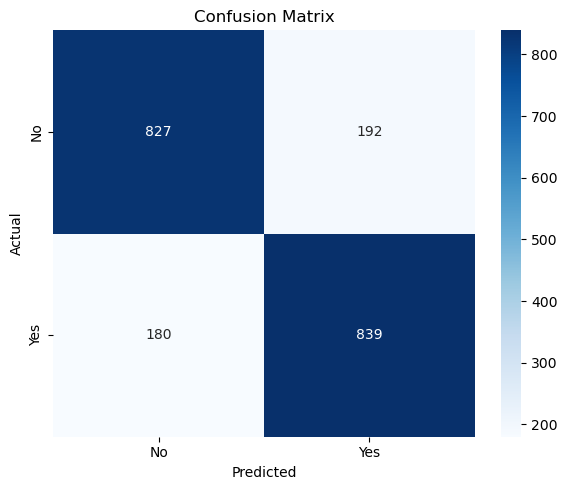

In [41]:
labels = ['No', 'Yes']
plt.figure(figsize=(6, 5))
sns.heatmap(results["confusion_matrix"], annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [96]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming you've loaded your dataset into df
# df = pd.read_csv('your_data.csv')
##                Feature      F-Score        p-value
#5               glucose  2143.009592   0.000000e+00
#10         hypertensive  1215.247598  1.232029e-251
#4          diastolic_bp  1086.643813  1.596026e-226
#3           systolic_bp  1077.939496  8.187671e-225
#7                weight   557.615837  4.503204e-120
#0                   age   346.337271   4.814445e-76
#1                gender   200.914186   3.542810e-45
#11  family_hypertension   161.415673   1.053491e-36
#9       family_diabetes   155.962287   1.570025e-35
#8                   bmi   108.192090   3.262166e-25

# Define features and target
features = ['glucose', 'hypertensive', 'diastolic_bp', 'systolic_bp',
            'weight']

target = 'diabetic'  # replace with your actual target column name

# Encode categorical columns if necessary
for col in ['gender', 'family_hypertension', 'family_diabetes']:
    if df_balanced[col].dtype == 'object':
        df_balanced[col] = LabelEncoder().fit_transform(df_balanced[col])

# Drop NA
df_balanced = df_balanced.dropna(subset=features + [target])

X = df_balanced[features]
y = df_balanced[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=70)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87       481
         1.0       0.87      0.92      0.89       538

    accuracy                           0.88      1019
   macro avg       0.89      0.88      0.88      1019
weighted avg       0.89      0.88      0.88      1019



C:\Users\Mostafa.Elgamal\AppData\Local\Temp\ipykernel_24612\4199101527.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




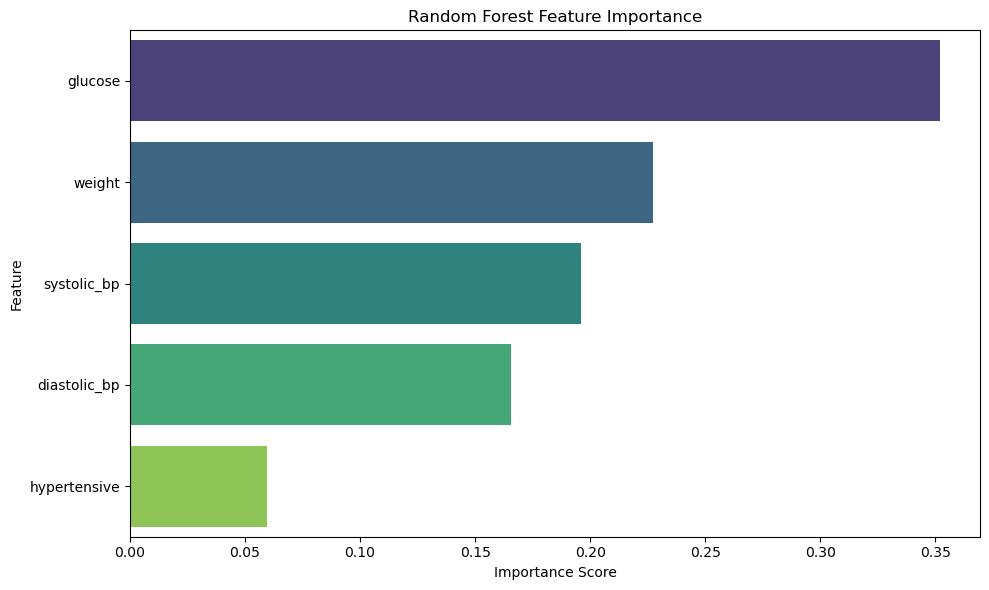

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [99]:
# Example input (replace with actual values)
new_data = pd.DataFrame([{
    'glucose': 350 / 18,  # ≈ 19.44 mmol/L
    'hypertensive': 1,
    'diastolic_bp': 200,
    'systolic_bp': 100,
    'weight': 130,
    #'age': 10,
    # add missing features with default or zero values if needed
}])


# Predict probability
proba = model.predict_proba(new_data)[0][1]
prediction = model.predict(new_data)[0]

# Output
print(f"Prediction: {'Diabetic' if prediction == 1 else 'Not Diabetic'}")
print(f"Probability of being diabetic: {proba:.2f}")


Prediction: Not Diabetic
Probability of being diabetic: 0.46


In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  # or your model

# Example model
model = RandomForestClassifier()

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())


Cross-validation scores: [0.91020608 0.90230731 0.91801669 0.91359843 0.9155621 ]
Average accuracy: 0.9119381240957882


In [77]:
import numpy as np
print("Standard deviation:", np.std(scores))


Standard deviation: 0.004973083417526567


In [ ]:
!pip install shap


   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.2 kB ? eta -:--:--
   ---------------------------------------- 545.2/545.2 kB 2.6 MB/s eta 0:00:00


In [ ]:
import shap

# Create SHAP explainer for tree-based models
explainer = shap.TreeExplainer(model)

# Compute SHAP values for a sample (you can use all of X if your dataset is small)
shap_values = explainer.shap_values(X)

# Summary plot — shows feature importance and direction of impact
shap.summary_plot(shap_values[1], X)  # [1] if you're dealing with classification (probability of class 1)


KeyboardInterrupt: 

In [ ]:
# Pick one row
sample = X.iloc[[0]]  # double brackets to keep it a DataFrame

# Calculate SHAP values for this instance
shap_value = explainer.shap_values(sample)

# Force plot for a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_value[1], sample)


: 

: 